#                                  Projeto Ferramentas de Programação 2

## Bruno Baring e Lorena Vianna

## Tema: Análise dos registros de passageiros do Titanic

<img src="titanic.png">

Fonte dos dados : https://www.kaggle.com/code/masumrumi/a-statistical-analysis-ml-workflow-of-titanic/data?select=titanic1_submission.csv

Dados originais: 
- titanic1_submission : Contém a identificação do passageiro e a info se sobreviveu ou não. útil para a base de teste, que não contém esta info.
- test e train : Bases com as informações abaixo

|Variable|Definition|Key|Notes|
|:----:|:----:|:----:|:----:|
|survival|Survival|0 = No, 1 = Yes|null|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|A proxy for socio-economic status (SES). 1st = Upper. 2nd = Middle. 3rd = Lower|
|sex|sex|male, female||
|Age|Age in years||Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5|
|sibsp|# of siblings / spouses aboard the Titanic||Sibling = brother, sister, stepbrother, stepsister. Spouse = husband, wife (mistresses and fiancés were ignored|
|parch|# of parents / children aboard the Titanic||Parent = mother, father. Child = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore parch=0 for them.|
|fare|Passenger fare|||
|cabin|Cabin number|||
|embarked|Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton|||


In [42]:
# Bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
# Importando as bases originais
ts = pd.read_csv('./titanic1_submission.csv')
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')


In [8]:
ts.head(3)

,PassengerId,Survived
0,892,1
1,893,1
2,894,0


In [13]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [10]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
# Como para esta etapa do projeto não há necessidade de divisão entre as bases de treino e teste, as mesmas serão unificadas.
#1. incluindo a variárel "survived" a basede teste:
test2=pd.merge(test, ts, on="PassengerId", how="left")

In [17]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


In [18]:
#juntando as duas bases, teste e treino num único dataframe
df=test2.append(train, ignore_index = True)

In [19]:
df.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,1,330911
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,1,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,0,240276


In [46]:
# criando uma nova coluna family, cujo objetivo é marcar se havia no navio algum familiar, ou seja, junção entre sibsp e parch
df['family'] = np.where(df['SibSp']>0 | df['Parch']>0, 'Yes', 'Not')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
#Criando uma nova coluna, com base no nome, para identififcar se o passageiro era casado ou solteiro.
###### HELP! só consigo pensar em sql aqui kkk a ideia era criar uma variável que se conter "Mr." ou "Mrs." então "Casado"

# Criando os primeiros gráficos usando pandas
Para esse bloco, criaremos os gráficos mais simples, para realizar a análise descritiva de cada variável isoladamente


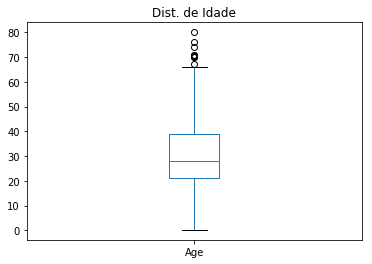

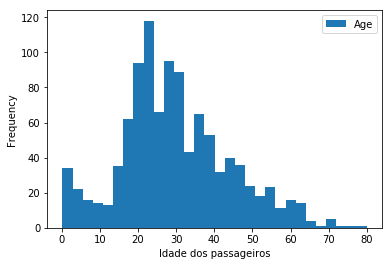

In [38]:
# Distribuição de idade
df.plot(y='Age', kind='box', title= 'Dist. de Idade')
age_hist = df.plot(y='Age', kind='hist', bins=30);
age_hist.set_xlabel('Idade dos passageiros', fontsize=10);

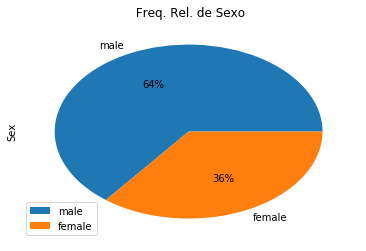

In [37]:
# proporção de homens e mulheres
df['Sex'].value_counts().plot(kind='pie',autopct='%1.0f%%', legend=True, title = ' Freq. Rel. de Sexo');

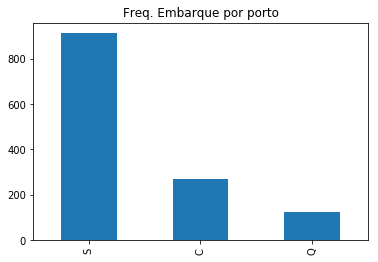

In [36]:
# Freq de embarques em cada porto
df['Embarked'].value_counts().plot(kind='bar',title = 'Freq. Embarque por porto');

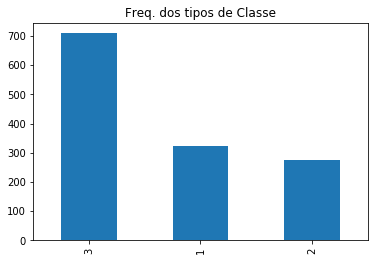

In [39]:
# Freq dos tipos de classe
df['Pclass'].value_counts().plot(kind='bar',title = 'Freq. dos tipos de Classe');

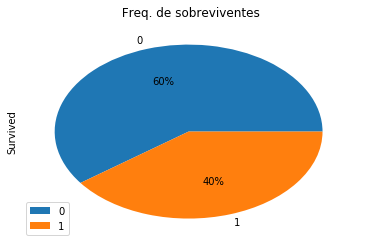

In [41]:
# proporção de sobreviventes
df['Survived'].value_counts().plot(kind='pie',autopct='%1.0f%%', legend=True, title = ' Freq. de sobreviventes');

# Bloco para identificar relações entre sobreviventes e não sobreviventes

In [ ]:
# Idade por sobreviventes e não sobreviventes

In [ ]:
# Tipo de classe por sobreviventes e não sobreviventes

In [ ]:
# Porto de embarque sobreviventes e não sobreviventes

In [ ]:
# Sexo por sobreviventes e não sobreviventes

In [ ]:
# sobreviventes por posse de "parentes"

O projeto desde módulo será uma aplicação prática do conteúdo de visualização de dados no python.  
  
**Objetivo**  
Realizar um EDA (Exploratory Data Analysis) implementando gráficos para tornar o resultado visual. Lembre-se de explorar as bibliotecas estudadas neste módulo (Pandas, Matplotlib, Plotly, Seaborn)  
  
**Base de Dados**  
Cada grupo será responsável por buscar uma base de dados de seu interesse  
  
**Composição das duplas**  
As duplas estão descritas segundo o excel "Equipes" presente no google drive, na pasta "projeto"  
  
**Github**  
Na mesma planilha das duplas insiram o link para o github  
  
**Apresentação**  
A apresentação poderá ser construída no formato de preferência (jupyter notebook, power point..)  
  
**Tempo de apresentação**  
Cada grupo terá no máximo 10 minutos para apresentar o EDA  
  
**Avaliação**  
Para a avaliação serão considerados os seguintes pontos
1. Entendimento do contexto em que se encaixa a base de dados
2. Uso de todas bibliotecas apresentadas neste módulo para criação de gráficos (ao menos um gráfico de cada biblioteca)
3. Apresentação das características do conjunto de dados fornecido, destacando sua visão geral acerca do conjunto de dados e tecendo críticas e comentários
4. Uso dos diferentes tipos de gráficos com as variáveis numéricas e categóricas 
5. Identificação e discussão de missings ou outliers na base de dados
6. Outras análises que sejam pertinentes 
  
**Data de apresentação**  
08/06/2022  
  
**Obs. 1**: Não esqueçam de considerar se as informações são públicas  
**Obs. 2**: Não esqueçam de se divertirem fazendo isso! :D  
  
**BOM TRABALHO!**